# 상관관계와 코사인 유사도

# 시계열 필터링과 특징 탐지

# k-평균 클러스터링

# 연습 문제

***상관관계 연습 문제***

## 연습 문제 3-1
- 두 벡터를 입력받아 두 개의 수를 출력하는 파이썬 함수
- 두 개의 수는 피어슨 상관계수와 코사인 유사도
- 이 장에서 제시한 공식을 따라 코드를 작성
- 변수들이 이미 평균중심화 되어 있다면 두 출력 결과과 동일하고 그렇지 않으면 서로 다른지 확인

In [50]:
import numpy as np

def corrAndCosine(X, Y):
    X_2 = X - np.mean(X)
    Y_2 = Y - np.mean(Y)    
    cor = np.dot(X_2, Y_2)/(np.linalg.norm(X_2)*np.linalg.norm(Y_2))
    cos = np.dot(X, Y)/(np.linalg.norm(X)*np.linalg.norm(Y))
    return cor, cos

In [39]:
X = np.random.rand(30)
Y = np.random.randint(1, 101, size=30)

In [42]:
corrAndCosine(X, Y)

(0.10533122377610801, 0.7973274552020431)

- 정답

In [41]:
# the function
def corrAndCosine(x,y):

    # compute cosine similarity
    num = np.dot(x,y) # numerator
    den = np.linalg.norm(x) * np.linalg.norm(y) # denominator
    cos = num / den

    # compute correlation (similar to above but mean-centered!)
    xm  = x-np.mean(x)
    ym  = y-np.mean(y)
    num = np.dot(xm,ym) # numerator
    den = np.linalg.norm(xm) * np.linalg.norm(ym) # denominator
    cor = num / den

    return cor,cos

In [34]:
# test it
a = np.random.randn(15)
b = np.random.randn(15)

# compute the correlation and cosine
r,c = corrAndCosine(a,b)

# confirm that the correlation matches with np.corrcoef
print(r,np.corrcoef(a,b)[0,1])

-0.278524973158778 -0.278524973158778


In [35]:
# compare r and c without mean-centering
a = np.random.randn(15) + 10 # note the offset!
b = np.random.randn(15)

# mean-center
aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)


# show the results with and without mean-centering
print('Without mean-centering (should differ):')
print( np.round(corrAndCosine(a,b),4) )
print(' ')

print('With mean-centering (should be the same):')
print( np.round(corrAndCosine(aNoMean,bNoMean),4) )

Without mean-centering (should differ):
[-0.3552  0.0476]
 
With mean-centering (should be the same):
[-0.3552 -0.3552]


## 연습 문제 3-2
- 0에서 3까지의 정수를 가진 변수와, 이 변수에 특정 오프셋을 더한 두 번째 변수를 만든다
- 오프셋을 -50에서 50까지 변경하는 시뮬레이션을 만든다
- for 루프에서 두 변수간의 상관관계와 코사인 유사도를 계산하고 저장한다
- 평균 오프셋이 상관관계와 코사인 유사성에 어떻게 영향을 주는지 보여주는 그래프를 그린다.

In [53]:
array1 = np.arange(0, 4)
offset = np.arange(-50, 51)

In [55]:
cor_list = []
cos_list = []

In [56]:
from tqdm import tqdm
for off in tqdm(offset):
    array2 = array1 + off
    cor, cos = corrAndCosine(array1, array2)
    cor_list.append(cor)
    cos_list.append(cos)

100%|██████████████████████████████████████| 101/101 [00:00<00:00, 28095.55it/s]


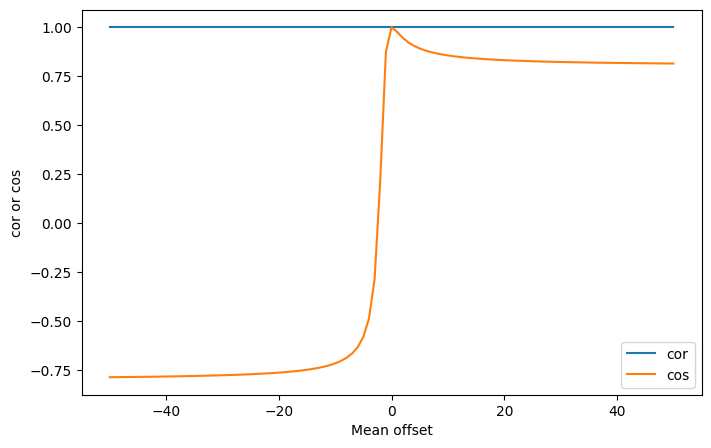

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(offset, cor_list, label='cor')
plt.plot(offset, cos_list, label='cos')
plt.legend()
plt.xlabel('Mean offset')
plt.ylabel('cor or cos')
plt.show()

- 정답

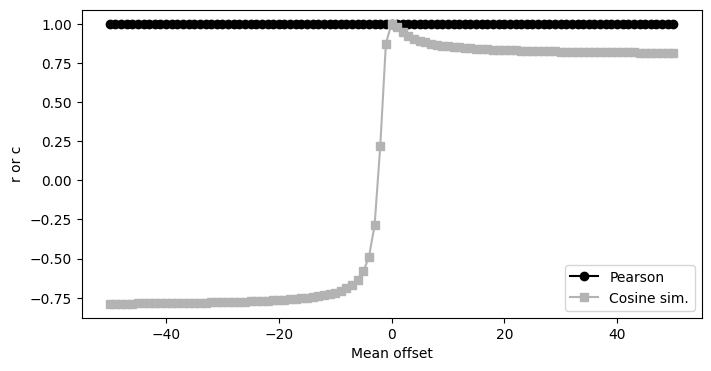

In [70]:
# create the variables
a = np.arange(4,dtype=float)
offsets = np.arange(-50,51)

# initialize the results
results = np.zeros((len(offsets),2))

# run the simulation!
for i in range(len(offsets)):
    results[i,:] = corrAndCosine(a,a+offsets[i])


# plot the results!
plt.figure(figsize=(8,4))
h = plt.plot(offsets,results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
# plt.savefig('Figure_03_02.png',dpi=300) # write out the fig to a file
plt.show()

## 연습 문제 3-3
- 피어슨 상관계수를 계산하는 여러가지 파이썬 함수가 있다.
- 그중 하나가 Scipy.stats.pearsonr 이고,
- 이 팜수의 [소스 코드](https://gist.github.com/xflr6/afb5bf740aa15a6c2a2c8f56cf768b80)를 열어 파이썬 구현이 이장에서 소개한 공식과 일치하는지 확인하라.

In [88]:
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

## 연습 문제 3-4
- 3-2의 코드를 수정하여 상관계수만 구하도록 하라
- 이 코드와 Numpy의 corrcoef 함수의 속도 비교를 하라
- 1000회 이상 for 루프를 돌며, 500개의 무작위 숫자를 가진 변수 두개를 생성 한다
- 이 두 변수의 상관계수를 계산하고 시간을 측정한다.
- 이 속도 비교를 통해, 라이브러리의 구현된 코드가 더 느릴수 있음을 확인 하라

In [89]:
import numpy as np

def my_corr(X, Y):
    X_2 = X - np.mean(X)
    Y_2 = Y - np.mean(Y)    
    return np.dot(X_2, Y_2)/(np.linalg.norm(X_2)*np.linalg.norm(Y_2))

In [90]:
from tqdm import tqdm

In [91]:
%time
for _ in tqdm(range(1000)):
    a = np.random.randn(15)
    b = np.random.randn(15)
    my_corr(a, b)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 43935.52it/s]


In [92]:
%time
for _ in tqdm(range(1000)):
    a = np.random.randn(15)
    b = np.random.randn(15)
    np.corrcoef(a, b)

CPU times: user 9 µs, sys: 4 µs, total: 13 µs
Wall time: 22.9 µs


100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 17414.08it/s]


***필터링과 특징 탐지 연습 문제***

## 연습 문제 3-5
- 정답

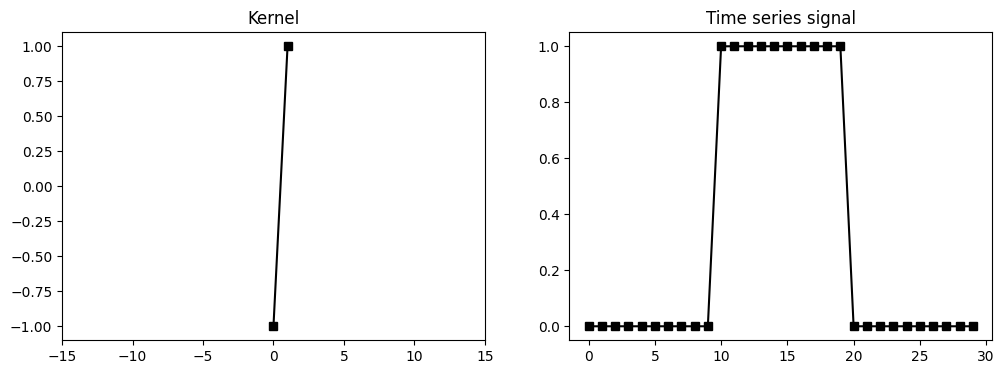

In [93]:
# create the kernel (in the book figure I used +1.5)
kernel = np.array([-1,1])

# and the "signal" (a plateau)
signal = np.zeros(30)
signal[10:20] = 1


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_04ab.png',dpi=300)
plt.show()

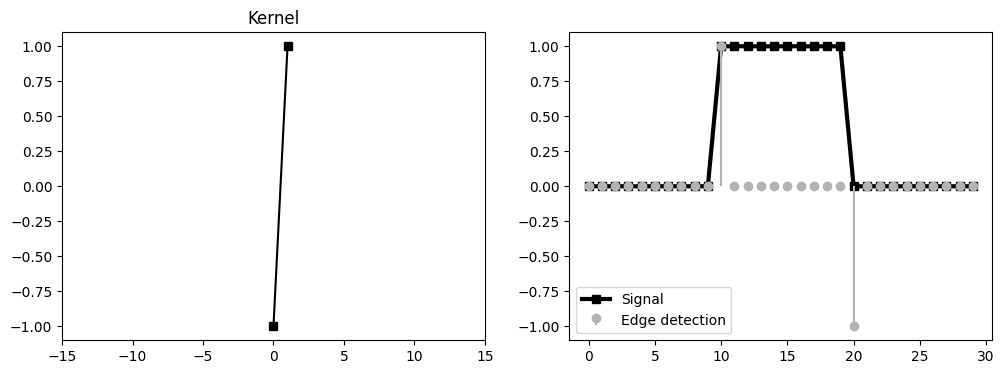

In [94]:
# initialize the feature map as zeros
featureMap = np.zeros(len(signal))

# loop over the signal and do template-matching (via dot products!)
for t in range(1,len(signal)-1):
    featureMap[t] = np.dot(kernel,signal[t-1:t+1])

# plot the result
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
markers,stemlines,_ = axs[1].stem(range(len(featureMap)),featureMap,
                                  basefmt=' ',linefmt='',markerfmt='o',
                                  label='Edge detection')

plt.setp(stemlines,'color',[.7,.7,.7])
plt.setp(markers,'color',[.7,.7,.7])

axs[1].legend()
plt.show()

## 연습 문제 3-6
- 울퉁불퉁한 시계열을 매끄럽게 만들기
- 시계열은 가우스 분포에서 생성한 100개의 난수
- 커널은 가우스 함수에 근사하는 종 모양의 함수로 숫자(0, .1, .3, .6, 1, .8, .3, .1, 0) 으로 정의

- 정답

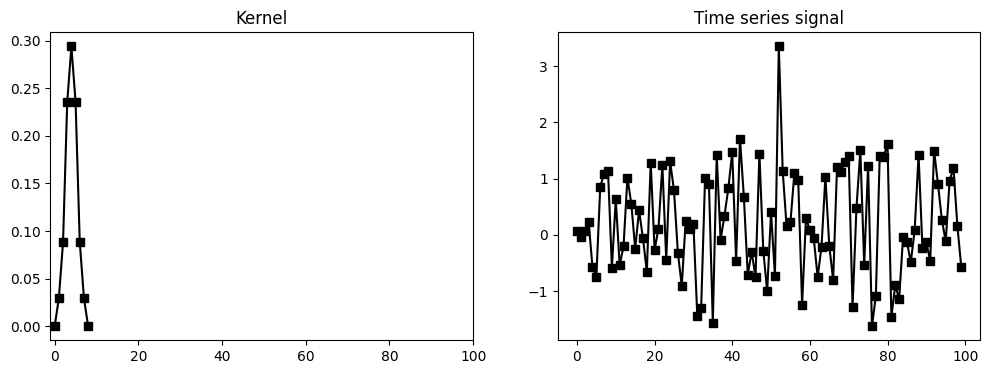

In [102]:
# create the kernel (in the book figure I used +1.5)
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)

# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)

# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_06ab.png',dpi=300)
plt.show()

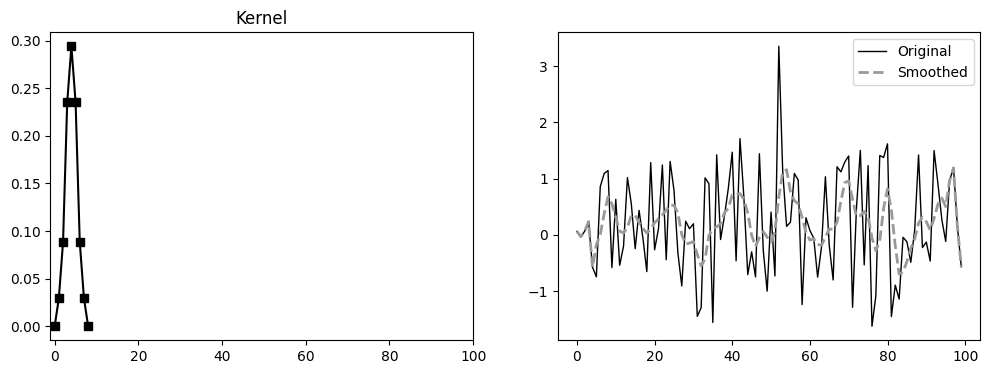

In [103]:
Nkernel = len(kernel)
halfKrn = Nkernel//2
# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1,Nsignal-halfKrn):
    filtsig[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])

# and plot
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,color='k',label='Original',linewidth=1)
axs[1].plot(filtsig,'--',color=[.6,.6,.6],label='Smoothed',linewidth=2)
axs[1].legend()

plt.show()

## 연습 문제 3-7
- 커널의 중앙의 1을 -1로 바꾸고 커널을 중앙 평균화 함
- 그 결과는?

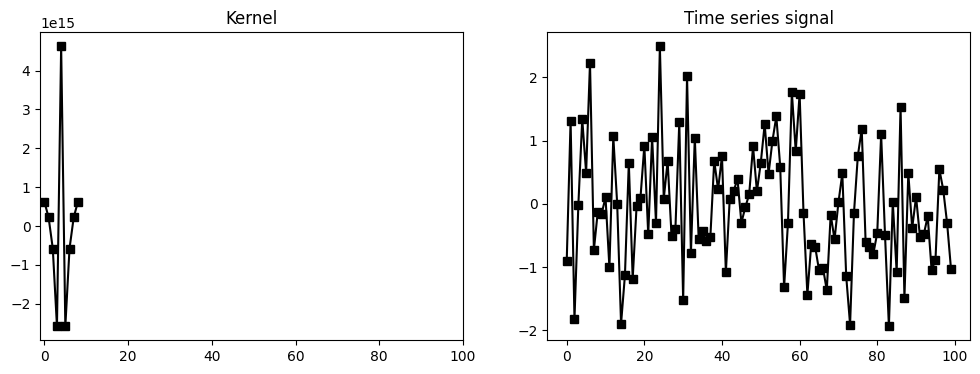

In [107]:
# create the kernel (in the book figure I used +1.5)
kernel = np.array([0,.1,.3,.8, -1,.8,.3,.1,0])
kernel = kernel - np.mean(kernel)
kernel = kernel / np.sum(kernel)

# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)

# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_06ab.png',dpi=300)
plt.show()

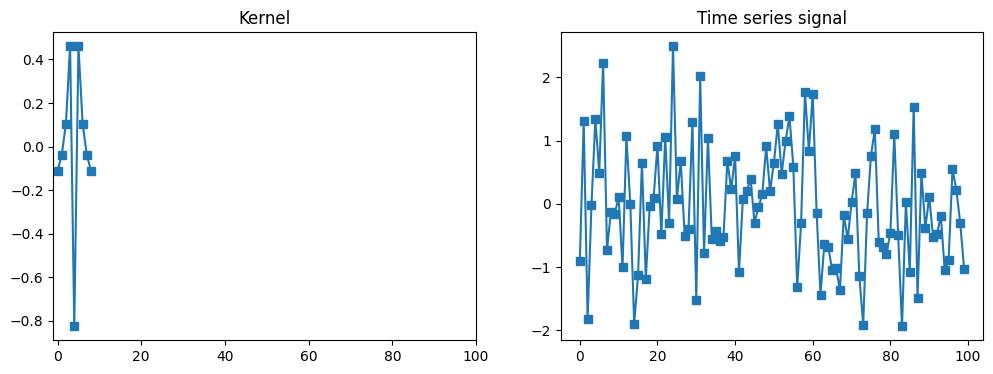

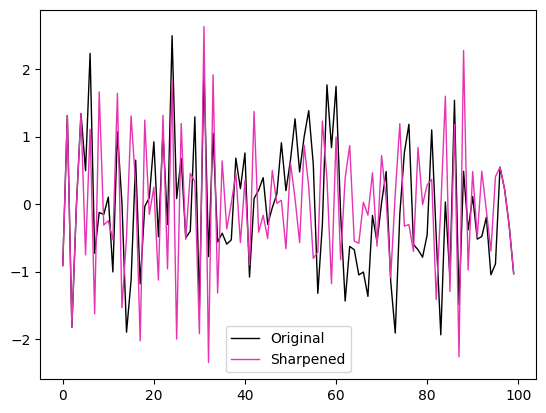

In [109]:
Nkernel = len(kernel)
halfKrn = Nkernel//2
# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1,Nsignal-halfKrn):
    filtsig[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])

# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'s-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'s-')
axs[1].set_title('Time series signal')
plt.show()


# loop over the signal time points
filtsig2 = timeseries.copy()
for t in range(halfKrn+1,Nsignal-halfKrn):
    filtsig2[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])

plt.plot(timeseries,color='k',label='Original',linewidth=1)
plt.plot(filtsig2,color=[.9,.2,.7],label='Sharpened',linewidth=1)
plt.legend()
plt.show()

- 정답

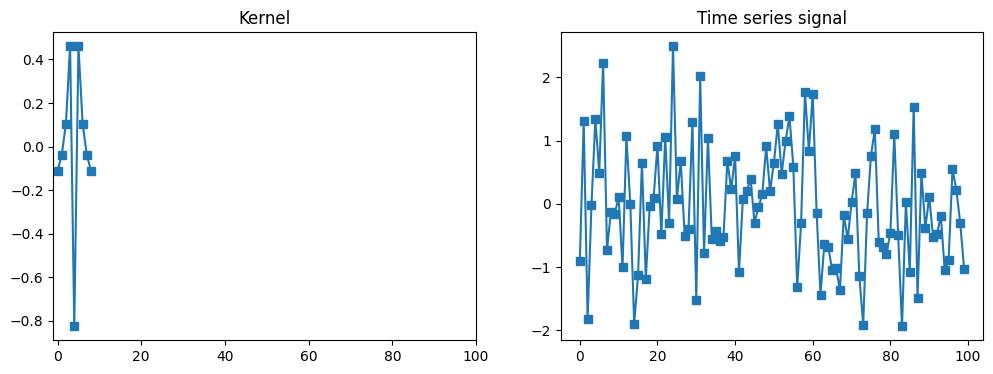

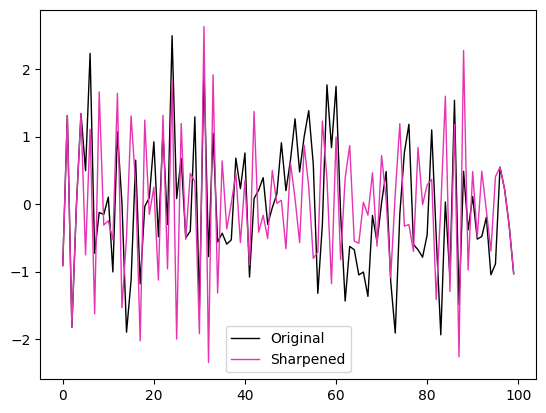

In [108]:
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0])
kernel /= np.sum(kernel)
kernel -= np.mean(kernel)

# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'s-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'s-')
axs[1].set_title('Time series signal')
plt.show()



# loop over the signal time points
filtsig2 = timeseries.copy()
for t in range(halfKrn+1,Nsignal-halfKrn):
    filtsig2[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])

plt.plot(timeseries,color='k',label='Original',linewidth=1)
plt.plot(filtsig2,color=[.9,.2,.7],label='Sharpened',linewidth=1)
plt.legend()
plt.show()

***k-평균 연습 문제***

## 연습 문제 3-8

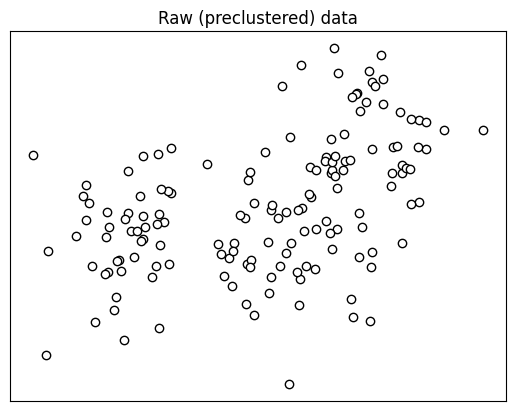

In [110]:
## Create data
nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a matrix
data = np.transpose( np.concatenate((a,b,c),axis=1) )


# plot data
plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()

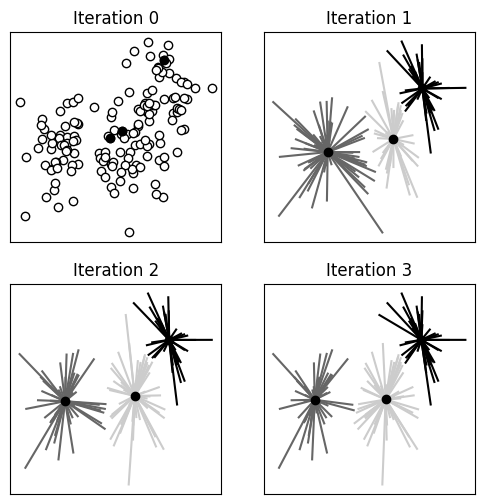

In [113]:
## initialize random cluster centroids
k = 3 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):
    
    # step 1: compute distances
    dists = np.zeros((data.shape[0],k))
    for ci in range(k):
        dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)

    # step 2: assign to group based on minimum distance
    groupidx = np.argmin(dists,axis=1)
    
  # step 3: recompute centers
    for ki in range(k):
        centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  # plot data points
    for i in range(len(data)):
        axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
    axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
    axs[iteri+1].set_title(f'Iteration {iteri+1}')
    axs[iteri+1].set_xticks([])
    axs[iteri+1].set_yticks([])

plt.show()

## 연습 문제 3-9

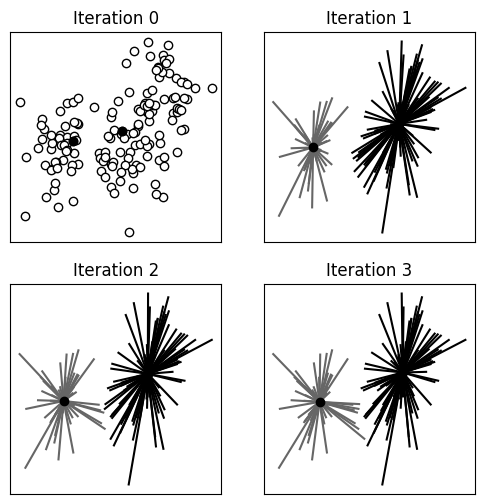

In [115]:
## initialize random cluster centroids
k = 2  #extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):
    
    # step 1: compute distances
    dists = np.zeros((data.shape[0],k))
    for ci in range(k):
        dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)

    # step 2: assign to group based on minimum distance
    groupidx = np.argmin(dists,axis=1)
    
  # step 3: recompute centers
    for ki in range(k):
        centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  # plot data points
    for i in range(len(data)):
        axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
    axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
    axs[iteri+1].set_title(f'Iteration {iteri+1}')
    axs[iteri+1].set_xticks([])
    axs[iteri+1].set_yticks([])

plt.show()

IndexError: list index out of range

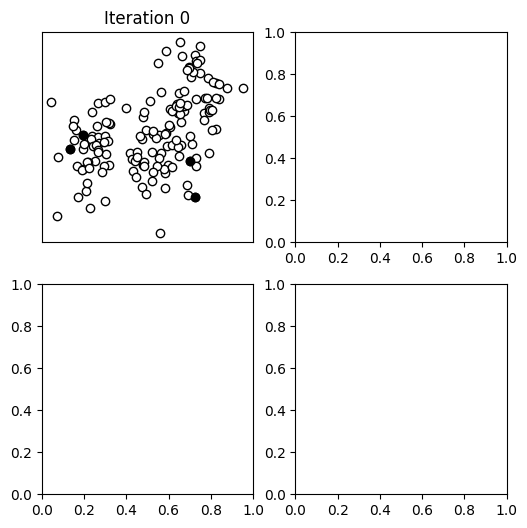

In [116]:
## initialize random cluster centroids
k = 4  #extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):
    
    # step 1: compute distances
    dists = np.zeros((data.shape[0],k))
    for ci in range(k):
        dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)

    # step 2: assign to group based on minimum distance
    groupidx = np.argmin(dists,axis=1)
    
  # step 3: recompute centers
    for ki in range(k):
        centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  # plot data points
    for i in range(len(data)):
        axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
    axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
    axs[iteri+1].set_title(f'Iteration {iteri+1}')
    axs[iteri+1].set_xticks([])
    axs[iteri+1].set_yticks([])

plt.show()